In [1]:
import pandas as pd 
import os
from email.parser import Parser
import nltk
import numpy as np
import json
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
nltk.download('stopwords')

/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to /home/dilsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
"""
root = '/home/dilsad/Downloads/maildir/'
folder_name = os.listdir(root)
to_email = []
from_email = []
email_body = []
directory = []
date = []
subject = []
errors = []


def analysis(input_file, to_email, from_email, email_body):
    
    with open(input_file, 'r', encoding='utf-8') as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            date.append(email['Date'])
            subject.append(email['subject'])
            to_email.append(email['to'])
            from_email.append(email['from'])
            directory.append(input_file)
            email_body.append(email.get_payload())
        except:
            errors.append(input_file)


for name in folder_name:
    direct = f'{root}{name}'
    for dir, folders, filenames in os.walk(direct):
        for filename in filenames:
            input_file = os.path.join(dir, filename)
            analysis(input_file, to_email, from_email, email_body)

dictionary = {'Directory' : directory, 'From' : from_email, 'To' : to_email, 'Body' : email_body, 'Date': date, 'Subject': subject}
#data_frame = pd.DataFrame(dictionary)
#data_frame.to_csv('/home/dilsad/Downloads/emails.csv', index=False)
with open("/home/dilsad/Downloads/emailJson.json", "w") as outfile:
    json.dump(dictionary, outfile)"""

In [110]:
import pickle

with open('preprocessing/data/lemmatized_word_list.pkl', 'rb') as file:
    data = pickle.load(file)
    print(data[0])

['today', 'daily', 'update', 'find', 'free', 'aol', 'divine_interventure', 'report', 'broadband', 'space', 'research', 'editor', 'pick', 'come', 'daily', 'investor', 'http', 'multexinvestor', 'com', 'promo_unl', 'investor', 'receive', 'mail', 'investor', 'unsubscribe', 'see', 'bottom', 'message', 'sponsor', 'energy', 'stock', 'select', 'sector', 'spdr', 'divide', 'sector', 'index', 'fund', 'pick', 'choose', 'piece', 'good', 'http', 'spdrindex', 'com', 'feature', 'today', 'edition', 'daily', 'update', 'special', 'announcement', 'treat', 'multex_investor', 'new', 'personal', 'finance', 'channel', 'take_advantage', 'top_notch', 'content', 'tool', 'free', 'daily', 'free', 'sponsor', 'report', 'robertson_stephen', 'maintain', 'buy', 'rating', 'divine_interventure', 'dvin', 'free', 'research', 'report', 'jefferie', 'buy', 'say', 'project', 'growth', 'remain', 'place', 'ask', 'analyst', 'hot', 'report', 'son', 'recent', 'issue', 'broadband', 'brief', 'report', 'late', 'development', 'broadban

In [3]:
# create dictionary and corpus both are needed for (LDA) topic modeling

# Create Dictionary
id2word = corpora.Dictionary(data)

# Create Corpus
texts = data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [4]:
id2word[0]

'aaii'

In [5]:
texts

[['today',
  'daily',
  'update',
  'find',
  'free',
  'aol',
  'divine_interventure',
  'report',
  'broadband',
  'space',
  'research',
  'editor',
  'pick',
  'come',
  'daily',
  'investor',
  'http',
  'multexinvestor',
  'com',
  'promo_unl',
  'investor',
  'receive',
  'mail',
  'investor',
  'unsubscribe',
  'see',
  'bottom',
  'message',
  'sponsor',
  'energy',
  'stock',
  'select',
  'sector',
  'spdr',
  'divide',
  'sector',
  'index',
  'fund',
  'pick',
  'choose',
  'piece',
  'good',
  'http',
  'spdrindex',
  'com',
  'feature',
  'today',
  'edition',
  'daily',
  'update',
  'special',
  'announcement',
  'treat',
  'multex_investor',
  'new',
  'personal',
  'finance',
  'channel',
  'take_advantage',
  'top_notch',
  'content',
  'tool',
  'free',
  'daily',
  'free',
  'sponsor',
  'report',
  'robertson_stephen',
  'maintain',
  'buy',
  'rating',
  'divine_interventure',
  'dvin',
  'free',
  'research',
  'report',
  'jefferie',
  'buy',
  'say',
  'proje

In [39]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           alpha='auto',
                                           per_word_topics=True)

In [23]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -7.880077703573522


In [24]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4679901016122635


In [70]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook(sort=True)
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds', R = 20)
pyLDAvis.display(vis)

/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/dilsad/Desktop/BeCode/Enron_UseCase_Clustering/env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib

In [28]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'model: {num_topics}/{limit}  per {step}')
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [41]:
#check the code ===> dictionary is problematic
def model_apply(params):
    corpus = params['corpus']
    id2word = params['id2word']
    num_topics = params['num_topics']
    model_list = params['model_list']
    coherence_values = params['coherence_values']

    print(f"start model with n topic: {params['num_topics']}")
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=40000,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
    print(f"END model with n topic: {params['num_topics']}")

def compute_coherence_values(dictionary=id2word, corpus, texts, limit, start=2, step=3):

    param_list = []
    coherence_values = []
    model_list = []
   
    params = {
        'corpus': corpus,
        'id2word': id2word,
        'num_topics': 0,
        'model_list': model_list,
        'coherence_values': coherence_values
    }

    for i in range(start, limit, step):
        params['num_topics'] = i
        param_list.append(params.copy())
    tuple(map(model_apply, param_list)()
   
       
    return model_list, coherence_values



In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=40, step=6)

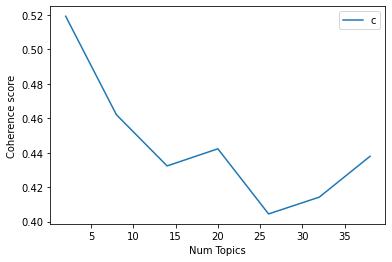

In [21]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5191
Num Topics = 8  has Coherence Value of 0.462
Num Topics = 14  has Coherence Value of 0.4323
Num Topics = 20  has Coherence Value of 0.4422
Num Topics = 26  has Coherence Value of 0.4045
Num Topics = 32  has Coherence Value of 0.4142
Num Topics = 38  has Coherence Value of 0.4379


In [107]:
lda_model.get_topic_terms(1, topn=20)

[(210, 0.02995371),
 (142, 0.026140746),
 (37, 0.02384886),
 (787, 0.023517046),
 (728, 0.012565306),
 (85, 0.011023418),
 (720, 0.010086916),
 (661, 0.009938211),
 (241, 0.008392229),
 (262, 0.0076370453),
 (86, 0.0066323853),
 (712, 0.0062283925),
 (49, 0.006171455),
 (151, 0.006050203),
 (113, 0.005712418),
 (136, 0.005146261),
 (133, 0.0048509478),
 (182, 0.0047117),
 (208, 0.00466103),
 (65, 0.0046241423)]

In [108]:
topic_token_dict = {}
num_topics = 8
topic_words = []
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,topn=20)
    topic_words.append([id2word[pair[0]] for pair in tt])
    topic_token_dict[i] = topic_words[i]  

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)